In [2]:
# installing necessary libraries
!pip install split-folders
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# importing necessary libraries
from google.colab import drive
from google.colab import files
import shutil
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from PIL import Image
import PIL
import os
import glob 
import tensorflow 
from numpy import asarray
import skimage
from skimage import io 
import random 
import splitfolders
import pandas as pd
import numpy as np
from sklearn import *
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# mounting google drive to local folders in google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# define grey scale location of dataset
submission_folder = '/content/drive/MyDrive/Deep_Learning_Research_Project/reduced_dimensionality_classification/submission/'
no_submission_folder = '/content/drive/MyDrive/Deep_Learning_Research_Project/reduced_dimensionality_classification/no_submission/'

In [6]:
data = '/content/drive/MyDrive/Deep_Learning_Research_Project/reduced_dimensionality_classification'

In [7]:
splitfolders.ratio(data, output="/content/", seed=1337, ratio=(.7, 0.1,0.2))

Copying files: 168 files [00:30,  5.59 files/s]


In [8]:
training_data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[2,3])
validation_data_generator = ImageDataGenerator(rescale=1./255,brightness_range=[2,3])
test_data_generator = ImageDataGenerator(rescale=1./255,brightness_range=[2,3])

In [9]:
folder = '/content'
training_data_dir=folder+'/train/'
validation_data_dir=folder+'/val/'
test_data_dir=folder+'/test/'
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
BATCH_SIZE=20
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 117 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 100)               4

In [11]:
EPOCHS=20
history=model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-11-9b7b1f0e02a8>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/20
5/5 [==============================] - 12s 2s/step - loss: 3.3177 - accuracy: 0.4742
Epoch 2/20
5/5 [==============================] - 9s 2s/step - loss: 0.7221 - accuracy: 0.5670
Epoch 3/20
5/5 [==============================] - 9s 2s/step - loss: 0.6887 - accuracy: 0.6082
Epoch 4/20
5/5 [==============================] - 10s 2s/step - loss: 0.6813 - accuracy: 0.5670
Epoch 5/20
5/5 [==============================] - 9s 2s/step - loss: 0.6778 - accuracy: 0.6392
Epoch 6/20
5/5 [==============================] - 9s 2s/step - loss: 0.6565 - accuracy: 0.6495
Epoch 7/20
5/5 [==============================] - 11s 2s/step - loss: 0.6887 - accuracy: 0.6186
Epoch 8/20
5/5 [==============================] - 9s 2s/step - loss: 0.6495 - accuracy: 0.6186
Epoch 9/20
5/5 [==============================] - 8s 2s/step - loss: 0.9485 - accuracy: 0.6804
Epoch 10/20
5/5 [==============================] - 9s 2s/step - loss: 0.6488 - accuracy: 0.6495
Epoch 11/20
5/5 [=============================

In [12]:
_, acc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc * 100.0))

<ipython-input-12-9d0084e8b089>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)


Test Accuracy: 68.571%


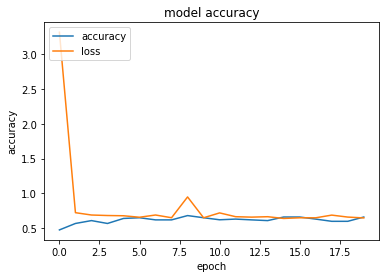

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

<ipython-input-14-756239d00930>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = df[df['Folder'] == 'train'].drop('Folder',1)
<ipython-input-14-756239d00930>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test = df[df['Folder'] == 'test'].drop('Folder',1)
<ipython-input-14-756239d00930>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator).argmax(axis=-1)


[[22  0]
 [13  0]]


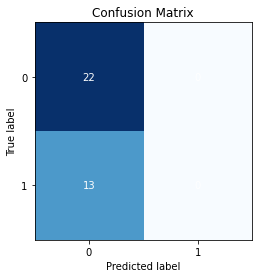

In [14]:
# folders to pandas dataframe
data = []
 
for folder in sorted(os.listdir('/content/')):
 if folder in ['test','train','val']:
   for file in sorted(os.listdir('/content/'+folder+'/')):
     for classification in sorted(os.listdir('/content/'+folder+'/'+file+'/')):
       # converting image to an array
       an_image = PIL.Image.open('/content/'+folder+'/'+file+'/'+classification)
      
       # other method to convert to array
       #image_sequence = an_image.getdata()
       #image_array = np.array(image_sequence)
 
       # other method to convert to array
       numpydata = asarray(an_image)
      
       # append folder name and arrays of images to data list
       data.append((folder, numpydata))
 
df = pd.DataFrame(data, columns=['Folder', 'File'])

X_train = df[df['Folder'] == 'train'].drop('Folder',1)
X_test = df[df['Folder'] == 'test'].drop('Folder',1)
 
y_train = df[df['Folder'] == 'train']['Folder']
y_test = df[df['Folder'] == 'test']['Folder']

y_true = test_generator.classes
y_pred = model.predict_generator(test_generator).argmax(axis=-1)
conf_mat = confusion_matrix(y_true, y_pred)

print(conf_mat)



cm = conf_mat

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(cm.shape[0]))
ax.set_yticks(np.arange(cm.shape[1]))

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center",
        color="w")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

plt.show()

In [15]:
#generating predictions
predictions = model.predict_generator(test_generator)

#convert predictions to labels
labels = np.argmax(predictions, axis=-1)

#generate the classification report
report = classification_report(test_generator.classes, labels, target_names=test_generator.class_indices)

print(report)

<ipython-input-15-28febed2f5fe>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


               precision    recall  f1-score   support

no_submission       0.63      1.00      0.77        22
   submission       0.00      0.00      0.00        13

     accuracy                           0.63        35
    macro avg       0.31      0.50      0.39        35
 weighted avg       0.40      0.63      0.49        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
outputfile='output.txt'
numtestimages=30
open(outputfile,"w")
probabilities = model.predict_generator(test_generator, numtestimages)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = imread(image_path)
    with open(outputfile,"a") as fh:
        fh.write(str(probability[0]) + " for: " + image_path + "\n")
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% submission")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% non-submission")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.